In [30]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

In [31]:
distance_matrix = pd.read_excel("RMSDtable.xlsx", sheet_name='Sheet1', index_col=0)
type(distance_matrix)
print(distance_matrix.shape) #tuple (8,8)
print(distance_matrix.shape[0]) #first position of tuple (8,8), number of rows
print(distance_matrix.shape[1]) #second position of tuple (8,8), number of columns

(8, 8)
8
8


In [32]:
def lower_tri_to_upper(lo_tri):
    for i in range(lo_tri.shape[0]):
        for j in range(lo_tri.shape[0]):
            if j < i:
                lo_tri.iloc[j,i] = lo_tri.iloc[i,j]
                lo_tri.iloc[i,j] = 0

    return lo_tri

mirror = lower_tri_to_upper(distance_matrix)
mirror

,5ENS,3W9H,5ENQ,5ENR,3AOD,5ENT,7B8R,7B8T
RMSD,,,,,,,,
5ENS,0.0,0.91,0.464,0.401,1.055,0.337,0.402,0.401
3W9H,0.0,0.00,0.946,0.907,0.834,1.099,1.078,0.984
5ENQ,0.0,0.00,0.000,0.268,1.140,0.531,0.563,0.605
5ENR,0.0,0.00,0.000,0.000,1.112,0.451,0.478,0.554
3AOD,0.0,0.00,0.000,0.000,0.000,1.212,1.220,1.163
5ENT,0.0,0.00,0.000,0.000,0.000,0.000,0.398,0.393
7B8R,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.460
7B8T,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000


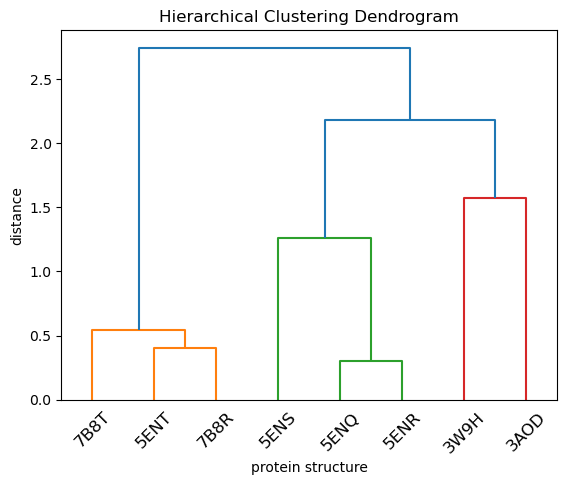

In [33]:
Z = linkage(mirror, 'ward', optimal_ordering=False) # single, complete, ward, average, weighted, centroid, median
fig = plt.figure()
dn = dendrogram(Z, labels=mirror.columns)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('protein structure')
plt.ylabel('distance')
plt.xticks(rotation=45)
plt.show()

In [34]:
Z[1]

array([5.        , 6.        , 0.40360005, 2.        ])